In [2]:
import matplotlib.pyplot as plt
import pandas as pd


# folder date
data
    |
    timestamp
        |
        base
        | 
        test1
        |
        test2
            |
            Golang
            |
            python
                |
                mergesort
                |
                quicksort
                        |
                        timmings
                        | 
                        dtlb-1.csv
                        |
                        dtlb-2.csv
                        |
                        dtlb-..csv
                        |
                        dtlb-base.csv
                        |
                        caceh-1.csv

                        

            

In [4]:
test_folder_names = ["2024-04-23-19-53-22"]

test_languages = ["golang","python","cpp"]

test_algorithm = ["mergesort","quicksort"]

test_data_measurments = ["perf-dTLB-misses","perf-cache-miss","timings"]

test_data_type = ["Full shuffeld list", "Partially shuffeld list", ]


test_data_counter =  2 # number of different types of test data (sorted,mixed,...)

test_repeats = 2


# Read and make avarage time


DEBUG: Lan cpp, Algo mergesort, Measure perf-dTLB-misses, data type 1


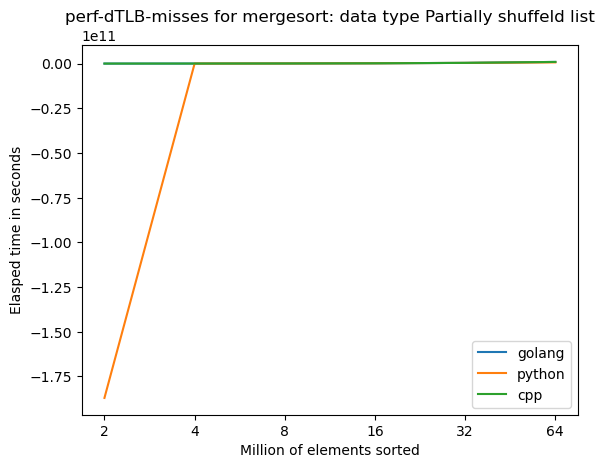

,golang,python,cpp
2,10706320.0,-1.870136e+11,10733005.0
4,28919744.0,2.833019e+07,28954083.0
8,71736142.0,7.054596e+07,71789835.0
16,172767086.0,1.703437e+08,172879852.0
32,405207417.0,4.004404e+08,405450486.0
64,936195262.0,6.757688e+08,936608337.0


DEBUG: Lan cpp, Algo quicksort, Measure perf-dTLB-misses, data type 1


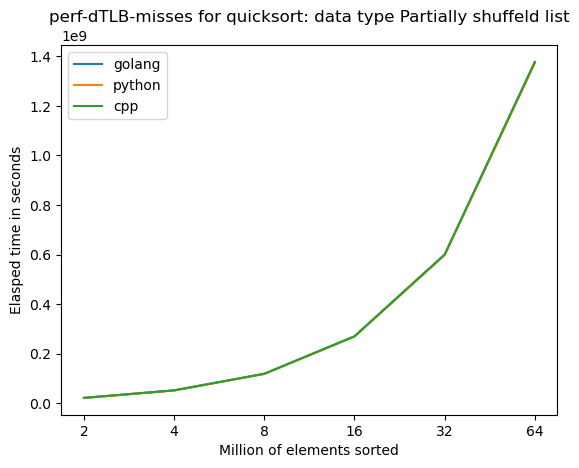

,golang,python,cpp
2,2.127014e+07,2.112066e+07,2.129470e+07
4,5.159226e+07,5.129448e+07,5.162694e+07
8,1.185263e+08,1.179751e+08,1.185907e+08
16,2.697721e+08,2.686567e+08,2.698662e+08
32,5.998289e+08,5.975281e+08,6.000782e+08
64,1.376848e+09,1.372544e+09,1.377399e+09


DEBUG: Lan cpp, Algo mergesort, Measure perf-cache-miss, data type 1


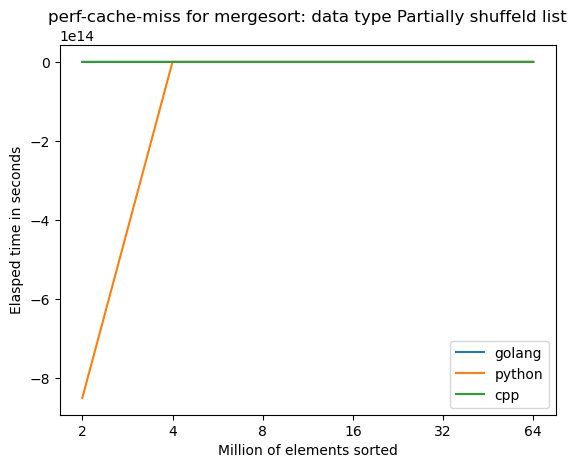

,golang,python,cpp
2,3.384146e+07,-8.500171e+14,3.561701e+07
4,8.585759e+07,5.795300e+07,8.955787e+07
8,2.049256e+08,1.491585e+08,2.125570e+08
16,4.849100e+08,3.737921e+08,5.008471e+08
32,1.111641e+09,8.971738e+08,1.150592e+09
64,2.621650e+09,2.458910e+09,2.704404e+09


DEBUG: Lan cpp, Algo quicksort, Measure perf-cache-miss, data type 1


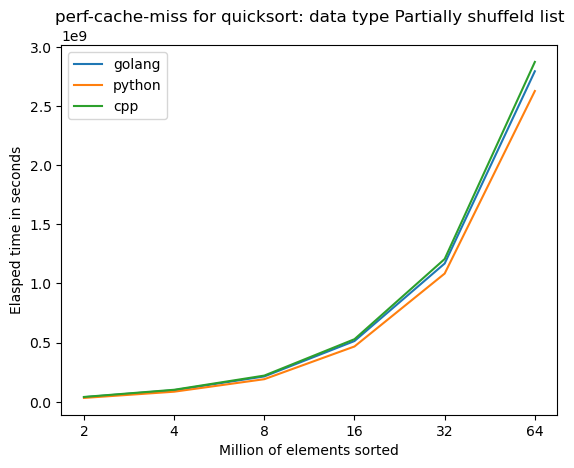

,golang,python,cpp
2,3.840337e+07,3.223979e+07,4.027005e+07
4,9.743391e+07,8.484523e+07,1.010960e+08
8,2.137524e+08,1.905346e+08,2.209512e+08
16,5.128588e+08,4.669608e+08,5.284632e+08
32,1.167946e+09,1.082992e+09,1.206003e+09
64,2.792097e+09,2.625272e+09,2.871008e+09


DEBUG: Lan cpp, Algo mergesort, Measure timings, data type 1


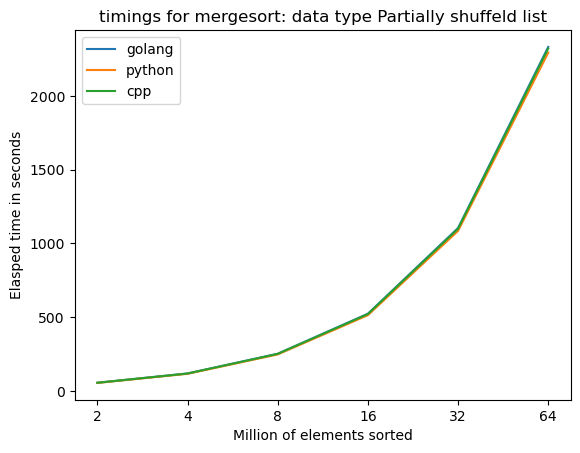

,golang,python,cpp
2,57.104013,55.871405,56.823776
4,120.035211,117.525221,119.387431
8,253.481540,248.673452,252.226927
16,524.321349,514.556709,521.690009
32,1104.887641,1085.478697,1099.563555
64,2331.158542,2292.438855,2320.442846


DEBUG: Lan cpp, Algo quicksort, Measure timings, data type 1


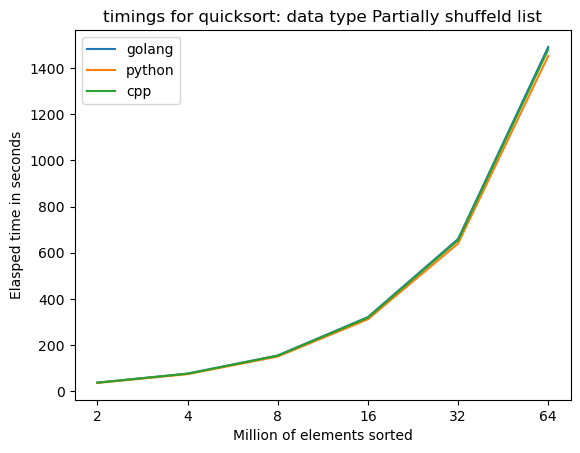

,golang,python,cpp
2,37.255941,36.007992,36.949415
4,76.411989,73.938905,75.756516
8,154.950858,150.182256,153.682178
16,321.167428,311.414066,318.508183
32,659.323730,639.847085,653.906800
64,1491.399576,1452.114156,1480.732684


In [7]:

for measurement in test_data_measurments:

    for i in range(1,test_data_counter): # test data type
        
        
        for algorithm in test_algorithm:
            id = 0
            asd = pd.DataFrame()
            
            for language in test_languages:     
            
                temp = []
                df = pd.DataFrame({'2': [], '4': [], '8': [], '16': [], '32': [], '64': []})
            
                for testnum in range(1,test_repeats+1):
                    
                    base_path = "../data/{}/base/{}/{}/{}-base.csv".format(test_folder_names[0], language, algorithm, measurement)
                    base_file = pd.read_csv(base_path,header=None)
                    
                    path = "../data/{}/test-{}/{}/{}/{}-{}.csv".format(test_folder_names[0], testnum, language, algorithm, measurement,i)
                    file = pd.read_csv(path,header=None)
                    #print("DEBUG: Lan {}, Algo {}, Measure {}".format(language, algorithm, measurement))
                    file.columns = ['2', '4', '8', '16', '32', '64']
                    base_file.columns = ['2', '4', '8', '16', '32', '64']
                                    
                    temp.append(file.sub(base_file))
                    

                df = pd.concat(temp, ignore_index=True)
                mean_values = df.mean()        
                # Convert mean_values to a DataFrame
                

                mean_df = pd.DataFrame(mean_values, columns=[language])
            
                # Display the new DataFrame
                asd.insert(id,language, mean_df)
                id += 1
            
            
            asd.plot()
            print("DEBUG: Lan {}, Algo {}, Measure {}, data type {}".format(language, algorithm, measurement,i))
            
            plt.title("{} for {}: data type {}".format(measurement,algorithm,test_data_type[i]))
            plt.xlabel("Million of elements sorted")
            plt.ylabel("Elasped time in seconds")
            plt.show()
            display(asd)
            
            del asd
        
    
            
